In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
from sklearn import metrics
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.utils import shuffle
import seaborn as sns
import glob
import os
from optichill import bas_filter
%matplotlib inline

c:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
f2_train = ['Plt2 m 2017-08.csv', 'Plt2 m 2017-09.csv', 'Plt2 m 2017-10.csv'] 
f2_test = ['Plt2 m 2017-07.csv', 'Plt2 m 2017-11.csv', 'Plt2 m 2017-12.csv','Plt2 m 2018-01.csv', 'Plt2 m 2018-02.csv', 'Plt2 m 2018-03.csv','Plt2 m 2018-04.csv']

w2_train = ['Plt2 m 2017-11.csv', 'Plt2 m 2017-12.csv','Plt2 m 2018-01.csv']
w2_test = ['Plt2 m 2017-07.csv','Plt2 m 2017-08.csv', 'Plt2 m 2017-09.csv', 'Plt2 m 2017-10.csv', 'Plt2 m 2018-02.csv', 'Plt2 m 2018-03.csv','Plt2 m 2018-04.csv']

sp2_train = ['Plt2 m 2018-02.csv', 'Plt2 m 2018-03.csv','Plt2 m 2018-04.csv']
sp2_test = ['Plt2 m 2017-07.csv','Plt2 m 2017-08.csv', 'Plt2 m 2017-09.csv', 'Plt2 m 2017-10.csv','Plt2 m 2017-11.csv', 'Plt2 m 2017-12.csv','Plt2 m 2018-01.csv']

df_fall_train, df_fall_test = bas_filter.train_single_plt( '../../Plt2', f2_train, f2_test, '../../Plt2/Plt2 Points List.xlsx', include_alarms=False)
df_spring_train, df_spring_test = bas_filter.train_single_plt( '../../Plt2', sp2_train, sp2_test, '../../Plt2/Plt2 Points List.xlsx', include_alarms=False)
df_winter_train, df_winter_test = bas_filter.train_single_plt( '../../Plt2', w2_train, w2_test, '../../Plt2/Plt2 Points List.xlsx', include_alarms=False)

Filtering Training Set
['../../Plt2\\Plt2 m 2017-08.csv']
['../../Plt2\\Plt2 m 2017-09.csv']
['../../Plt2\\Plt2 m 2017-10.csv']
Descriptors in the points list that are not in the datasets.
CHWPSPD2
CT1_CTcmd_Alarm
CT2_CTcmd_AlarmCT
Original data contains 26709 points and 412 dimensions.
A CDWP1Failed was noted and 9506 datapoints were removed from the dataset.
A CDWP1SPD_Alarm was noted and 9758 datapoints were removed from the dataset.
A CDWP2Failed was noted and 9758 datapoints were removed from the dataset.
A CDWP2SPD_Alarm was noted and 10143 datapoints were removed from the dataset.
A CDWP3Failed was noted and 10143 datapoints were removed from the dataset.
A CDWP3SPD_Alarm was noted and 10144 datapoints were removed from the dataset.
A CDWP4Failed was noted and 10144 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 10145 datapoints were removed from the dataset.
A CDWPTR_ALARM was noted and 10145 datapoints were removed from the dataset.
A CH1_CHLRcmd_Alar

['../../Plt2\\Plt2 m 2017-08.csv']
['../../Plt2\\Plt2 m 2017-09.csv']
['../../Plt2\\Plt2 m 2017-10.csv']
['../../Plt2\\Plt2 m 2017-11.csv']
['../../Plt2\\Plt2 m 2017-12.csv']
['../../Plt2\\Plt2 m 2018-01.csv']
Descriptors in the points list that are not in the datasets.
CHWPSPD2
CT1_CTcmd_Alarm
CT2_CTcmd_AlarmCT
Original data contains 62447 points and 412 dimensions.
A CDWP1Failed was noted and 15844 datapoints were removed from the dataset.
A CDWP1SPD_Alarm was noted and 16331 datapoints were removed from the dataset.
A CDWP2Failed was noted and 17477 datapoints were removed from the dataset.
A CDWP2SPD_Alarm was noted and 17862 datapoints were removed from the dataset.
A CDWP3Failed was noted and 17877 datapoints were removed from the dataset.
A CDWP3SPD_Alarm was noted and 22060 datapoints were removed from the dataset.
A CDWP4Failed was noted and 22060 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 22089 datapoints were removed from the dataset.
A CDWPTR_A

A PCHWPTR_Alarm was noted and 16164 datapoints were removed from the dataset.
A RUNCTFAN_Alarm was noted and 16164 datapoints were removed from the dataset.
Filtered data contains 30420 points and 232 dimensions.


In [3]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [4]:
model_plt2_fall= GradientBoostingRegressor(**params)

In [5]:
model_plt2_win= GradientBoostingRegressor(**params)

In [6]:
model_plt2_spr= GradientBoostingRegressor(**params)

In [8]:
ytrain_fall = df_fall_train['kW/Ton'].values
ytest_fall = df_fall_test['kW/Ton'].values
xtrain_fall = df_fall_train.drop(['kW/Ton'], axis=1).values
xtest_fall = df_fall_test.drop(['kW/Ton'], axis=1).values

In [9]:
ytrain_win = df_winter_train['kW/Ton'].values
ytest_win= df_winter_test['kW/Ton'].values
xtrain_win = df_winter_train.drop(['kW/Ton'], axis=1).values
xtest_win = df_winter_test.drop(['kW/Ton'], axis=1).values

In [10]:
ytrain_spr = df_spring_train['kW/Ton'].values
ytest_spr = df_spring_test['kW/Ton'].values
xtrain_spr = df_spring_train.drop(['kW/Ton'], axis=1).values
xtest_spr = df_spring_test.drop(['kW/Ton'], axis=1).values

In [12]:
model_plt2_fall.fit(xtrain_fall, ytrain_fall)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [13]:
model_plt2_win.fit(xtrain_win, ytrain_win)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [14]:
model_plt2_spr.fit(xtrain_spr, ytrain_spr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [15]:
ypred_fall = model_plt2_fall.predict(xtest_fall)

In [16]:
ypred_win = model_plt2_win.predict(xtest_win)

In [19]:
ypred_spr = model_plt2_spr.predict(xtest_spr)

In [24]:
ytest = [ytest_fall, ytest_win, ytest_spr]
ypred = [ypred_fall, ypred_win, ypred_spr]

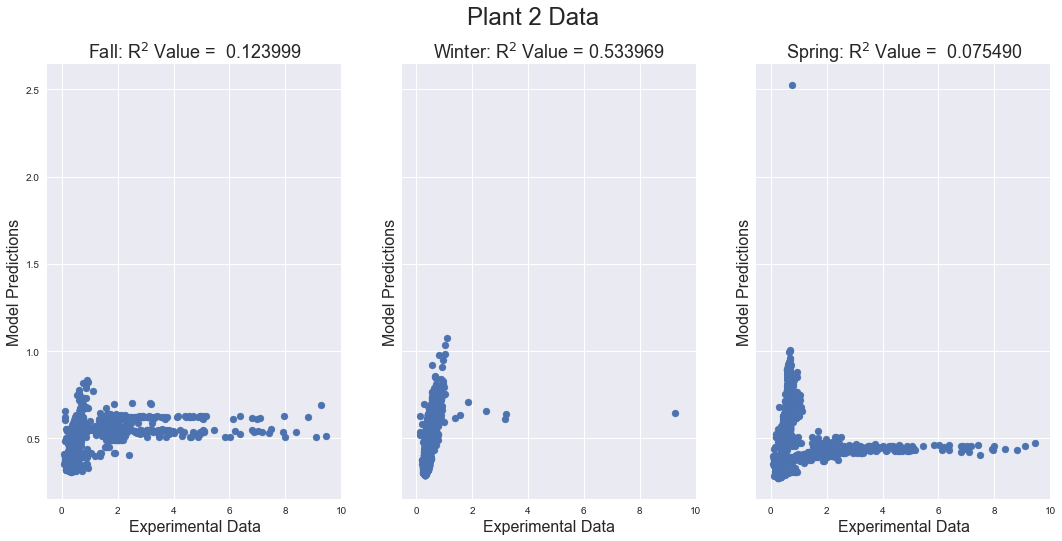

In [25]:
test_score = []
sns.set()
plt.figure()
fig, ax = plt.subplots(1, 3, figsize = (18, 8), sharex=True, sharey=True)
for i in range(0, 3):
    test_score.append(r2_score(ytest[i], ypred[i]))
    ax[i].scatter(ytest[i], ypred[i])
    fs = 20
    ax[i].set_xlabel("Experimental Data", fontsize=fs-4)
    ax[i].set_ylabel("Model Predictions", fontsize=fs-4)
ax[0].set_title("Fall: R$^{2}$ Value =  %f" %(test_score[0]), fontsize = fs-2)
ax[1].set_title("Winter: R$^{2}$ Value = %f" %(test_score[1]), fontsize = fs-2)
ax[2].set_title("Spring: R$^{2}$ Value =  %f" %(test_score[2]), fontsize = fs-2)

fig.suptitle("Plant 2 Data", fontsize=fs+4)
plt.savefig('r2_values_plt2.png')

In [39]:
feature_importance = model_plt2_fall.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_fall_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [40]:
df_fall_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [41]:
df_fall_feats.to_csv('Feat_imp_fall_test_plt2.csv')

In [42]:
feature_importance = model_plt2_win.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_winter_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [43]:
df_win_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [44]:
df_win_feats.to_csv('Feat_imp_winter_test_plt2.csv')

In [45]:
feature_importance = model_plt2_spr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_spring_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [46]:
df_spr_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [47]:
df_win_feats.to_csv('Feat_imp_spring_test_plt2.csv')